In [1]:
# Librairie de base
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
pd.options.mode.chained_assignment = None
import statistics
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder

# Naive Models
from sklearn import dummy

# Neighbors Models
from sklearn.neighbors import KNeighborsRegressor

# Model Selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
# Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Ensemble Models
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Pipeline
from sklearn.pipeline import make_pipeline

# Metrics
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

# Feature importance
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance
import shap

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Option d'affichage
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# 0. Préparation du dataset

## 01. Pre-processing

In [2]:
# Chargement des données
data = pd.read_csv('cleaned_dataset.csv').drop(['Unnamed: 0','TotalGHGEmissions','ENERGYSTARScore'],axis=1)

In [3]:
# catégorielle
cat = []
# numérique
num = []

target = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']

for col in data.columns:
    if data[col].dtype == 'object':
        cat.append(col)
    elif col not in target:
        num.append(col)
    else:
        pass

In [4]:
X = pd.get_dummies(data).drop('SiteEnergyUse(kBtu)',axis=1)

In [102]:
X

,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,NumberofFloors,NumberofBuildings,LargestPropertyUseTypeGFA,NaturalGasRate,ElectricityRate,SteamUseRate,Age,Mean_GFA,CBD_distance_km,GFABuildingRate,BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential WA,BuildingType_SPS-District K-12,PrimaryPropertyType_Education,PrimaryPropertyType_Food,PrimaryPropertyType_Healthcare,PrimaryPropertyType_Industrial,PrimaryPropertyType_Lodging,PrimaryPropertyType_Office,PrimaryPropertyType_Other,PrimaryPropertyType_PublicService,PrimaryPropertyType_Retail,SecondLargestPropertyUseType_Education,SecondLargestPropertyUseType_Entertainment,SecondLargestPropertyUseType_Food,SecondLargestPropertyUseType_Healthcare,SecondLargestPropertyUseType_Industrial,SecondLargestPropertyUseType_Lodging,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_PublicService,SecondLargestPropertyUseType_Retail,ThirdLargestPropertyUseType_Education,ThirdLargestPropertyUseType_Entertainment,ThirdLargestPropertyUseType_Food,ThirdLargestPropertyUseType_Healthcare,ThirdLargestPropertyUseType_Industrial,ThirdLargestPropertyUseType_Lodging,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Retail,LargestPropertyUseType_Education,LargestPropertyUseType_Entertainment,LargestPropertyUseType_Food,LargestPropertyUseType_Healthcare,LargestPropertyUseType_Industrial,LargestPropertyUseType_Lodging,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_PublicService,LargestPropertyUseType_Retail
0,25148.829268,10259.394445,12.0,1.0,88434.0,17.66,54.61,27.73,89.0,7369.500000,0.481841,100.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,24300.951220,10189.394445,10.0,1.0,61320.0,26.66,40.75,32.59,90.0,6132.000000,0.675452,100.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,23482.000000,9080.722222,11.0,1.0,81352.0,51.18,48.82,0.00,90.0,7546.181818,0.694813,100.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,22584.634146,9834.240741,8.0,1.0,102761.0,6.12,57.74,36.14,90.0,12845.125000,0.680426,100.000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,76961.439024,14111.283334,15.0,1.0,163984.0,46.82,53.18,0.00,112.0,10932.266667,0.625880,100.000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,147597.000000,14111.283334,12.0,1.0,342173.0,16.18,83.82,0.00,1.0,40283.083333,1.643477,65.617,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1136,13217.219512,7083.481481,1.0,1.0,52085.0,79.68,20.32,0.00,61.0,52085.000000,7.227222,91.894,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1137,20325.804878,6819.351852,2.0,1.0,24990.0,50.98,49.02,0.00,87.0,12495.000000,8.934535,100.000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1138,0.000000,4552.074074,3.0,1.0,45728.0,0.00,100.00,0.00,1.0,15000.000000,3.122591,100.000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [5]:
# Normalisation des données via minmax car données à différentes échelles et non-normales
# Enlever la colonne ENERGYSTARScore, soit la 4ème colonne, donc rang 3
Xminmax = MinMaxScaler().fit_transform(X)

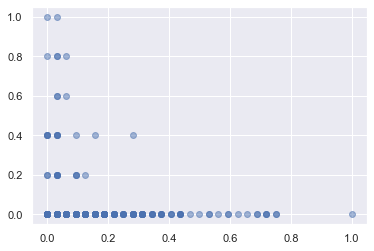

In [6]:
%matplotlib inline
# Pas de différence significative, on peut donc passer par MinMaxScaler
plt.scatter(Xminmax[:,2],Xminmax[:,3],alpha=0.5)

In [7]:
# Passage au log
transformer = FunctionTransformer(np.log,
                                  inverse_func = np.exp,
                                  check_inverse = True
                                 )

## 02. Passage au log

In [8]:
# Définition de la target
y = data['SiteEnergyUse(kBtu)']

In [9]:
y_log = transformer.transform(y)

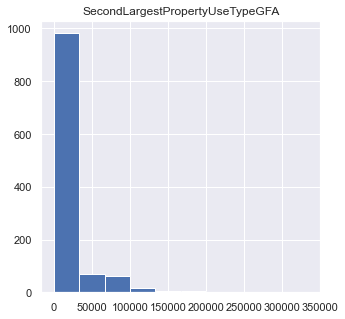

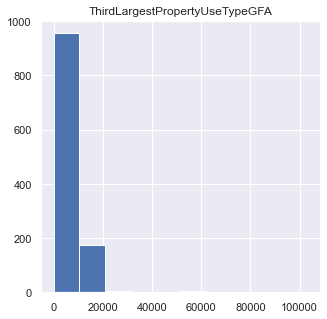

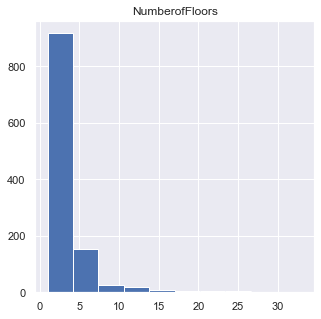

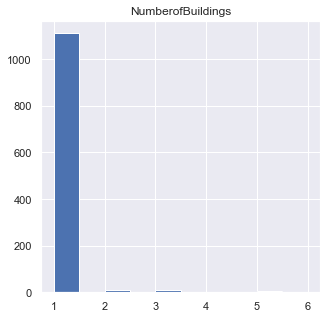

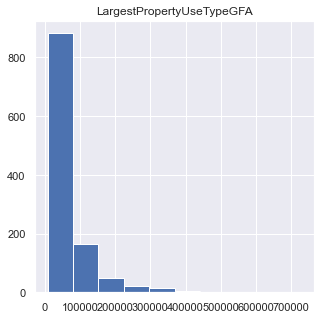

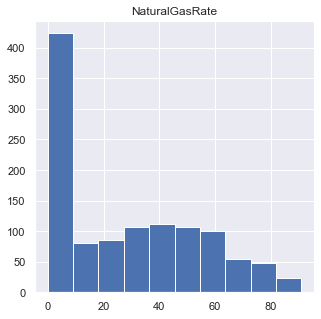

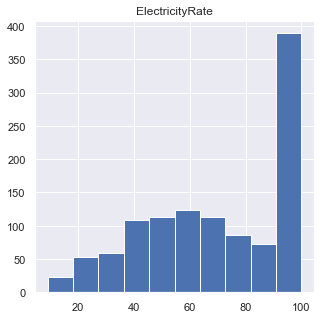

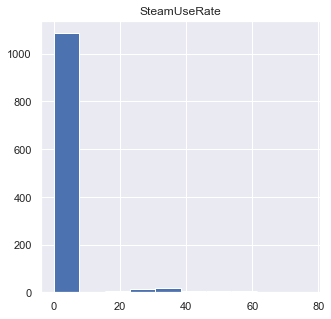

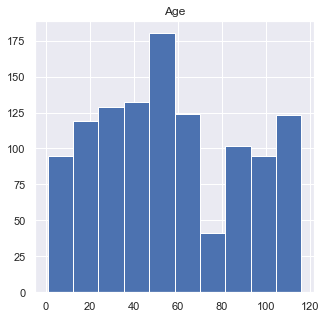

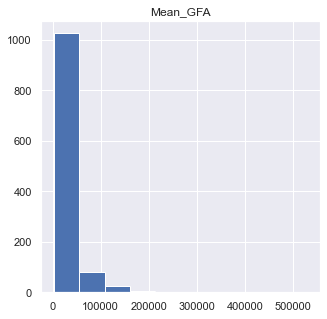

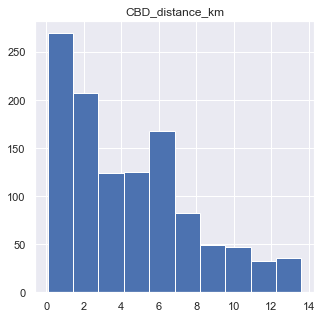

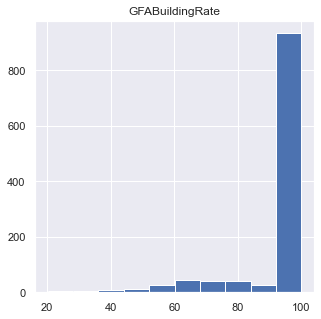

In [10]:
# Vérification de la normalité des données
for col in data[num].columns: 
    plt.figure(figsize=(5,5))
    plt.hist(data[col])
    plt.title(col)

Text(0.5, 1.0, 'Log SiteEnergyUse')

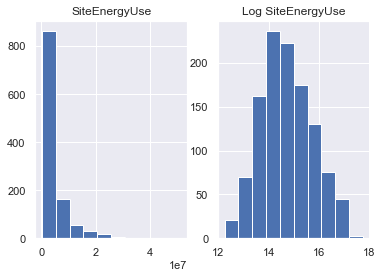

In [11]:
# Normalise les données
%matplotlib inline
f, ax = plt.subplots(1,2)

ax[0].hist(y)
ax[0].set_title('SiteEnergyUse')
ax[1].hist(y_log)
ax[1].set_title('Log SiteEnergyUse')

In [12]:
# Ajouter une target log + faire des listes avec / sans log pour comparer les corrélations
data['LogSiteEnergyUse'] = np.log(data['SiteEnergyUse(kBtu)'])
feats = [col for col in data.columns if col != 'LogSiteEnergyUse']
logfeats = [col for col in data.columns if col != 'SiteEnergyUse(kBtu)']

[Text(0.5, 1.0, 'transformed data')]

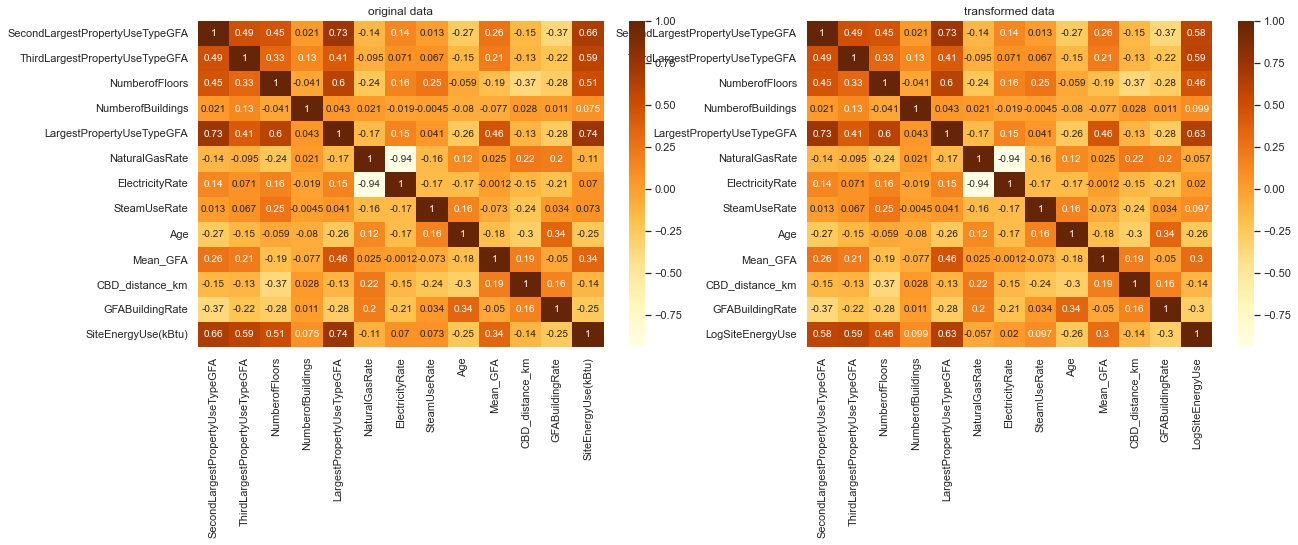

In [13]:
# Afficher une ligne et toutes les colonnes ?
# Permet de baisser le taux de corrélation entre la target et les autres variables
f, (ax1,ax2) = plt.subplots(1,2, figsize = (20,6))
sns.heatmap(data[feats].corr(),annot = True, cmap = 'YlOrBr', ax = ax1).set(title = 'original data')
sns.heatmap(data[logfeats].corr(),annot = True, cmap = 'YlOrBr', ax = ax2).set(title = 'transformed data')

## 04. Séparation du jeu de données

In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xminmax, y, test_size=0.2)

In [15]:
y_train_log = np.log(y_train)

## 05. Dummy Regressor

In [16]:
# Création d'un modèle Dummy
dum = dummy.DummyRegressor()

# Entraînement
dum.fit(X_train,y_train_log)

DummyRegressor()

In [17]:
# Prédiction sur le jeu de test
y_pred_dum = dum.predict(X_test)

In [18]:
# Evaluate
print("RMSE Dummy : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum))),
      "\nr2 Dummy : {:.4f}".format(metrics.r2_score(y_test, y_pred_dum))
     )

RMSE Dummy : 6201804.28 
r2 Dummy : -0.6872


## 06. Random prediction

La moyenne des erreurs est bien plus élevée que pour un modèle Dummy, il n'est donc pas utile de garder cette approche naïve.

In [19]:
y_pred_rand = np.random.randint(np.min(y), np.max(y), y_test.shape)

In [20]:
print("RMSE Random : {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rand))),
      "\nr2 Random : {:.4f}".format(metrics.r2_score(y_test, y_pred_rand)))

RMSE Random : 25731761.90 
r2 Random : -28.0446


# 1. Linear Regression

In [21]:
# On crée un modèle de régression linéaire vide
lr = LinearRegression()

In [22]:
# Utilisation d'une grille de recherche des meilleurs paramètres avec validation croisée
linearreg = GridSearchCV(lr, param_grid = {},
                       return_train_score = True,
                       scoring = 'r2', cv =5)

# On entraine le modèle à partir des données d'entrainement
linearreg.fit(X_train,y_train_log)

GridSearchCV(cv=5, estimator=LinearRegression(), param_grid={},
             return_train_score=True, scoring='r2')

In [23]:
# On affiche le meilleur score possible du validation set par rapport aux données d'entrainement
print('Train Score : {:.2f}'.format(linearreg.best_score_))

Train Score : -2264764343713984413696.00


In [24]:
# On crée un modèle de régression Ridge vide
lr = LinearRegression()

# Appliquer les paramètres de la grille
lr.set_params(**linearreg.best_params_)

# Recréer un split du jeu de données pour entrainer le modèle
lr.fit(X_train, y_train)

# On crée une variable contenant des targets prédites à partir des données de test
y_pred_lr = lr.predict(X_test)

# 2. Ridge Regression

In [25]:
# On crée un modèle de régression Ridge vide
lr_ridge = Ridge(random_state=0)

In [26]:
# Initialisation des paramètres
n_alphas = 100
alpha = np.linspace(0.2, 1, n_alphas)
params = {'alpha' : alpha}

# Utilisation d'une grille de recherche des meilleurs paramètres avec validation croisée
grid_ridge = GridSearchCV(lr_ridge, param_grid = params, 
                          return_train_score = True,
                          scoring = 'r2', cv = 5)

In [27]:
# On entraine le modèle à partir des données d'entrainement
grid_ridge.fit(X_train,y_train_log)

GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': array([0.2       , 0.20808081, 0.21616162, 0.22424242, 0.23232323,
       0.24040404, 0.24848485, 0.25656566, 0.26464646, 0.27272727,
       0.28080808, 0.28888889, 0.2969697 , 0.30505051, 0.31313131,
       0.32121212, 0.32929293, 0.33737374, 0.34545455, 0.35353535,
       0.36161616, 0.36969697, 0.37777778, 0.38585859, 0.39393939,
       0.4020...
       0.76565657, 0.77373737, 0.78181818, 0.78989899, 0.7979798 ,
       0.80606061, 0.81414141, 0.82222222, 0.83030303, 0.83838384,
       0.84646465, 0.85454545, 0.86262626, 0.87070707, 0.87878788,
       0.88686869, 0.89494949, 0.9030303 , 0.91111111, 0.91919192,
       0.92727273, 0.93535354, 0.94343434, 0.95151515, 0.95959596,
       0.96767677, 0.97575758, 0.98383838, 0.99191919, 1.        ])},
             return_train_score=True, scoring='r2')

In [28]:
grid_ridge.best_params_

{'alpha': 1.0}

In [29]:
# On affiche le meilleur score possible du validation set par rapport aux données d'entrainement
print('Best Train Score : {:.2f}'.format(grid_ridge.best_score_))

Best Train Score : 0.61


In [30]:
# On crée un modèle de régression Ridge vide
lr_ridge = Ridge(random_state=0)

# Appliquer les paramètres de la grille
lr_ridge.set_params(**grid_ridge.best_params_)

# Recréer un split du jeu de données pour entrainer le modèle
lr_ridge.fit(X_train, y_train)

# On crée une variable contenant des targets prédites à partir des données de test
y_pred_ridge = lr_ridge.predict(X_test)

# 3. Lasso Regression

In [31]:
# On crée un modèle de régression linéaire
lr_lasso = Lasso(random_state=0)

In [32]:
# Initialisation des paramètres
alpha = np.linspace(0.001, 0.006, 100)
params = {'alpha' : alpha}

# Utilisation d'une grille de recherche des meilleurs paramètres avec validation croisée
grid_lasso = GridSearchCV(lr_lasso, param_grid = params, 
                          return_train_score = True,
                          scoring = 'r2', cv = 5)

# On entraine le modèle à partir des données d'entrainement
grid_lasso.fit(X_train,y_train_log)

GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': array([0.001     , 0.00105051, 0.00110101, 0.00115152, 0.00120202,
       0.00125253, 0.00130303, 0.00135354, 0.00140404, 0.00145455,
       0.00150505, 0.00155556, 0.00160606, 0.00165657, 0.00170707,
       0.00175758, 0.00180808, 0.00185859, 0.00190909, 0.0019596 ,
       0.0020101 , 0.00206061, 0.00211111, 0.00216162, 0.00221212,
       0.002...
       0.00453535, 0.00458586, 0.00463636, 0.00468687, 0.00473737,
       0.00478788, 0.00483838, 0.00488889, 0.00493939, 0.0049899 ,
       0.0050404 , 0.00509091, 0.00514141, 0.00519192, 0.00524242,
       0.00529293, 0.00534343, 0.00539394, 0.00544444, 0.00549495,
       0.00554545, 0.00559596, 0.00564646, 0.00569697, 0.00574747,
       0.00579798, 0.00584848, 0.00589899, 0.00594949, 0.006     ])},
             return_train_score=True, scoring='r2')

In [33]:
grid_lasso.best_params_

{'alpha': 0.005343434343434344}

In [34]:
# On affiche le meilleur score possible du validation set par rapport aux données d'entrainement
print('Best Score : {:.2f}'.format(grid_lasso.best_score_))

Best Score : 0.59


In [35]:
# On crée un modèle de régression Ridge vide
lr_lasso = Lasso(random_state=0)

# Appliquer les paramètres de la grille
lr_lasso.set_params(**grid_lasso.best_params_)

# Recréer un split du jeu de données pour entrainer le modèle
X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = model_selection.train_test_split(Xminmax, y_log, test_size=0.2)
lr_lasso.fit(X_train, y_train)

# On crée une variable contenant des targets prédites à partir des données de test
y_pred_lasso = lr_lasso.predict(X_test)

# 4. Elastic Net

In [85]:
# On crée un modèle de régression linéaire
elastic_net = ElasticNet(random_state=0)

In [86]:
# Initialisation des paramètres
n_alphas = 50
alpha = np.linspace(0.001, 0.0045, n_alphas)
l1_ratio = np.linspace(0.2, 0.8, n_alphas)
params = {
    'alpha' : alpha,
    'l1_ratio' : l1_ratio
         }

# Utilisation d'une grille de recherche des meilleurs paramètres avec validation croisée
grid_elastic = GridSearchCV(elastic_net, param_grid = params, 
                          return_train_score = True,
                          scoring = 'r2', cv = 5)

# On entraine le modèle à partir des données d'entrainement
grid_elastic.fit(X_train,y_train_log)

GridSearchCV(cv=5, estimator=ElasticNet(random_state=0),
             param_grid={'alpha': array([0.001     , 0.00107143, 0.00114286, 0.00121429, 0.00128571,
       0.00135714, 0.00142857, 0.0015    , 0.00157143, 0.00164286,
       0.00171429, 0.00178571, 0.00185714, 0.00192857, 0.002     ,
       0.00207143, 0.00214286, 0.00221429, 0.00228571, 0.00235714,
       0.00242857, 0.0025    , 0.00257143, 0.00264286, 0.00271429,
       0.00278571,...
       0.44489796, 0.45714286, 0.46938776, 0.48163265, 0.49387755,
       0.50612245, 0.51836735, 0.53061224, 0.54285714, 0.55510204,
       0.56734694, 0.57959184, 0.59183673, 0.60408163, 0.61632653,
       0.62857143, 0.64081633, 0.65306122, 0.66530612, 0.67755102,
       0.68979592, 0.70204082, 0.71428571, 0.72653061, 0.73877551,
       0.75102041, 0.76326531, 0.7755102 , 0.7877551 , 0.8       ])},
             return_train_score=True, scoring='r2')

In [87]:
grid_elastic.best_params_

{'alpha': 0.0020714285714285713, 'l1_ratio': 0.3591836734693878}

In [39]:
# On affiche le meilleur score possible du validation set par rapport aux données d'entrainement
print('Best Score : {:.2f}'.format(grid_elastic.best_score_))

Best Score : 0.61


In [40]:
# On crée un modèle de régression Ridge vide
elastic_net = ElasticNet(random_state=0)

# Appliquer les paramètres de la grille
elastic_net.set_params(**grid_elastic.best_params_)

# Recréer un split du jeu de données pour entrainer le modèle
elastic_net.fit(X_train, y_train)

# On crée une variable contenant des targets prédites à partir des données de test
y_pred_elastic = elastic_net.predict(X_test)

# 5. Random Forest

In [41]:
# Encapsulage du modèle (hyperparamètre choisi avec RandomizedSearchCV)
randomforest = RandomForestRegressor(max_features='sqrt',random_state=0)

In [42]:
# Initialisation des paramètres
n_estimators = np.arange(10,
                         40,
                         1,
                         dtype=int)

min_samples_split =  np.arange(5,
                              15,
                              1,
                              dtype=int)
min_samples_leaf = np.arange(0,
                            10,
                            1,
                            dtype=int)
max_samples = np.arange(.1,
                        .5,
                        .001)
max_depth = np.arange(15,
                      35,
                      1,
                      dtype=int)

params = {'n_estimators' : n_estimators, 
          'max_depth' : max_depth,
          'min_samples_split' : min_samples_split,
          'min_samples_leaf' : min_samples_leaf,
          'max_samples' : max_samples
          }

# Utilisation d'une grille de recherche des meilleurs paramètres avec validation croisée
grid_rf = RandomizedSearchCV(randomforest, params, n_iter=50,
                          return_train_score = True,
                          scoring = 'r2', cv = 3)

# On entraine le modèle à partir des données d'entrainement
grid_rf.fit(X_train,y_train_log)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_features='sqrt',
                                                   random_state=0),
                   n_iter=50,
                   param_distributions={'max_depth': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
       32, 33, 34]),
                                        'max_samples': array([0.1  , 0.101, 0.102, 0.103, 0.104, 0.105, 0.106, 0.107, 0.108,
       0.109, 0.11 , 0.111, 0.112, 0.113, 0.114, 0.115, 0.116, 0.117,
       0.118, 0.119, 0.12 , 0.1...
       0.478, 0.479, 0.48 , 0.481, 0.482, 0.483, 0.484, 0.485, 0.486,
       0.487, 0.488, 0.489, 0.49 , 0.491, 0.492, 0.493, 0.494, 0.495,
       0.496, 0.497, 0.498, 0.499]),
                                        'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])},
                   return_train_score=True, scoring='r2')

In [43]:
grid_rf.best_params_

{'n_estimators': 14,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_samples': 0.4860000000000003,
 'max_depth': 29}

In [44]:
# On affiche le meilleur score possible du validation set par rapport aux données d'entrainement
print('Best Score : {:.3f}'.format(grid_rf.best_score_))

Best Score : 0.827


In [45]:
# On crée un modèle de régression Ridge vide
randomforest = RandomForestRegressor(random_state=0)

# Appliquer les paramètres de la grille
randomforest.set_params(**grid_rf.best_params_)

# Recréer un split du jeu de données pour entrainer le modèle
randomforest.fit(X_train, y_train)

# On crée une variable contenant des targets prédites à partir des données de test
y_pred_rf = randomforest.predict(X_test)

# 6. KNN Regressor

In [46]:
# Encapsulage du modèle (hyperparamètre choisi avec GridSearchCV)
knn = KNeighborsRegressor(metric='manhattan')

In [47]:
# Initialisation des paramètres
n_neighbors = np.linspace(1, 20, 19).astype(int)

params = {'n_neighbors' : n_neighbors}

# Utilisation d'une grille de recherche des meilleurs paramètres avec validation croisée
grid_knn = GridSearchCV(knn, param_grid=params,
                          return_train_score = True,
                          scoring = 'r2', cv = 5)

# On entraine le modèle à partir des données d'entrainement
grid_knn.fit(X_train,y_train_log)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(metric='manhattan'),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 20])},
             return_train_score=True, scoring='r2')

In [48]:
grid_knn.best_params_

{'n_neighbors': 7}

In [49]:
# On affiche le meilleur score possible du validation set par rapport aux données d'entrainement
print('Best Score : {:.2f}'.format(grid_knn.best_score_))

Best Score : 0.43


In [50]:
# On crée un modèle de régression Ridge vide
knn = KNeighborsRegressor()

# Appliquer les paramètres de la grille
knn.set_params(**grid_knn.best_params_)

# Recréer un split du jeu de données pour entrainer le modèle
knn.fit(X_train, y_train)

# On crée une variable contenant des targets prédites à partir des données de test
y_pred_knn = knn.predict(X_test)

# 7. GradientBoostingRegressor

In [51]:
# On crée un modèle de régression linéaire
gbr = GradientBoostingRegressor(loss='huber',random_state=0)

In [52]:
# Initialisation des paramètres
n_estimators = np.arange(50,
                         100,
                         1,
                         dtype=int)

params = {'n_estimators':n_estimators}

# Utilisation d'une grille de recherche des meilleurs paramètres avec validation croisée
grid_gbr = GridSearchCV(gbr, params,
                          return_train_score = True,
                          scoring = 'r2', cv = 5)

In [53]:
# On entraine le modèle à partir des données d'entrainement
grid_gbr.fit(X_train,y_train_log)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(loss='huber', random_state=0),
             param_grid={'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
       84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             return_train_score=True, scoring='r2')

In [54]:
grid_gbr.best_params_

{'n_estimators': 81}

In [55]:
# On affiche le meilleur score possible du validation set par rapport aux données d'entrainement
print('Best Score : {:.2f}'.format(grid_gbr.best_score_))

Best Score : 0.89


In [56]:
# On crée un modèle de régression Ridge vide
gbr = GradientBoostingRegressor(random_state=0)

# Appliquer les paramètres de la grille
gbr.set_params(**grid_gbr.best_params_)

# Recréer un split du jeu de données pour entrainer le modèle
gbr.fit(X_train, y_train)

# On crée une variable contenant des targets prédites à partir des données de test
y_pred_gbr = gbr.predict(X_test)

# 8. XGBoost

In [57]:
# On crée un modèle de régression linéaire
xgbr = XGBRegressor(booster='gbtree')

In [58]:
# Initialisation des paramètres
n_estimators = np.arange(50,
                         150,
                         1,
                         dtype=int)
min_child_weight = np.arange(1,
                             10,
                             1,
                             dtype=int)
max_depth = np.arange(1,
                      8,
                      5,
                      dtype=int)
learning_rate = np.linspace(0.05,
                            0.1,
                            20)
base_score = np.linspace(.20,
                         .5,
                         20)

params = {'base_score':base_score,
         'learning_rate':learning_rate,
         'max_depth':max_depth,
         'min_child_weight':min_child_weight,
         'n_estimators':n_estimators
         }

# Utilisation d'une grille de recherche des meilleurs paramètres avec validation croisée
grid_xgbr = RandomizedSearchCV(
                            estimator=xgbr,
                            param_distributions=params,
                            cv=3,
                            n_iter=50,
                            scoring ='r2',
                            n_jobs=3,
                            return_train_score = True,
                            random_state=42
                               )

In [59]:
# On entraine le modèle à partir des données d'entrainement
grid_xgbr.fit(X_train,y_train_log)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=No...
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149])},
                   random_state=42, return_train_score=True, scoring='r2')

In [60]:
grid_xgbr.best_params_

{'n_estimators': 91,
 'min_child_weight': 2,
 'max_depth': 6,
 'learning_rate': 0.07631578947368421,
 'base_score': 0.2789473684210526}

In [61]:
# On affiche le meilleur score possible du validation set par rapport aux données d'entrainement
print('Best Score : {:.2f}'.format(grid_xgbr.best_score_))

Best Score : 0.89


In [62]:
# On crée un modèle de régression Ridge vide
xgbr = XGBRegressor(random_state=0)

# Appliquer les paramètres de la grille
xgbr.set_params(**grid_xgbr.best_params_)

# Recréer un split du jeu de données pour entrainer le modèle
X_train_xgbr, X_test_xgbr, y_train_xgbr, y_test_xgbr = model_selection.train_test_split(Xminmax, y_log, test_size=0.2)
xgbr.fit(X_train, y_train)

# On crée une variable contenant des targets prédites à partir des données de test
y_pred_xgbr = xgbr.predict(X_test)

# END. Interprétation des résultats

In [89]:
from sklearn import metrics

In [90]:
RMSE = {
'KNN':np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)),
'Linear':np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)),
'Lasso':np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)),
'Elastic Net':np.sqrt(metrics.mean_squared_error(y_test, y_pred_elastic)),
'Ridge':np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)),
'XGBoost':np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgbr)),
'GBR':np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr)),
'Random Forest':np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))}

In [91]:
MAE = {
'KNN':metrics.mean_absolute_error(y_test, y_pred_knn),
'Linear':metrics.mean_absolute_error(y_test, y_pred_lr),
'Lasso':metrics.mean_absolute_error(y_test, y_pred_lasso),
'Elastic Net':metrics.mean_absolute_error(y_test, y_pred_elastic),
'Ridge':metrics.mean_absolute_error(y_test, y_pred_ridge),
'XGBoost':metrics.mean_absolute_error(y_test, y_pred_xgbr),
'GBR':metrics.mean_absolute_error(y_test, y_pred_gbr),
'Random Forest':metrics.mean_absolute_error(y_test, y_pred_rf)}

In [92]:
MdAE = {
'KNN':metrics.median_absolute_error(y_test, y_pred_knn),
'Linear':metrics.median_absolute_error(y_test, y_pred_lr),
'Lasso':metrics.median_absolute_error(y_test, y_pred_lasso),
'Elastic Net':metrics.median_absolute_error(y_test, y_pred_elastic),
'Ridge':metrics.median_absolute_error(y_test, y_pred_ridge),
'XGBoost':metrics.median_absolute_error(y_test, y_pred_xgbr),
'GBR':metrics.median_absolute_error(y_test, y_pred_gbr),
'Random Forest':metrics.median_absolute_error(y_test, y_pred_rf)
}

In [93]:
r2_train = {
'KNN':grid_knn.best_score_,
'Linear':linearreg.best_score_,
'Lasso':grid_lasso.best_score_,
'Elastic Net':grid_elastic.best_score_,
'Ridge':grid_ridge.best_score_,
'XGBoost':grid_xgbr.best_score_,
'GBR':grid_gbr.best_score_,
'Random Forest':grid_rf.best_score_
}

In [94]:
r2_test = {
'KNN':metrics.r2_score(y_test, y_pred_knn),
'Linear':metrics.r2_score(y_test, y_pred_lr),
'Lasso':metrics.r2_score(y_test, y_pred_lasso),
'Elastic Net':metrics.r2_score(y_test, y_pred_elastic),
'Ridge':metrics.r2_score(y_test, y_pred_ridge),
'XGBoost':metrics.r2_score(y_test, y_pred_xgbr),
'GBR':metrics.r2_score(y_test, y_pred_gbr),
'Random Forest':metrics.r2_score(y_test, y_pred_rf)
}

In [95]:
models = ['KNN',
          'Linear',
          'Lasso',
          'Elastic Net',
          'Ridge',
          'XGBoost',
          'GBR',
          'Random Forest',
          ]
metrics = ['RMSE','MAE','MdAE','r2_train','r2_test']
dict_metrics = [RMSE,MAE,MdAE,r2_train,r2_test]
df_metrics = pd.DataFrame(dict_metrics,index=metrics)
rounded = df_metrics.apply(np.round,decimals=2)
rounded

,KNN,Linear,Lasso,Elastic Net,Ridge,XGBoost,GBR,Random Forest
RMSE,3662463.89,3.178658e+06,3160704.30,2831146.13,2823091.78,1763785.96,1785067.75,1729116.46
MAE,2295188.39,1.832303e+06,1828928.56,1768381.79,1761744.71,696142.36,759360.13,707462.99
MdAE,1381141.52,1.037427e+06,1040736.29,1097210.23,1069818.64,186013.22,284129.76,176206.26
r2_train,0.43,-2.264764e+21,0.59,0.61,0.61,0.89,0.89,0.83
r2_test,0.41,5.600000e-01,0.56,0.65,0.65,0.86,0.86,0.87


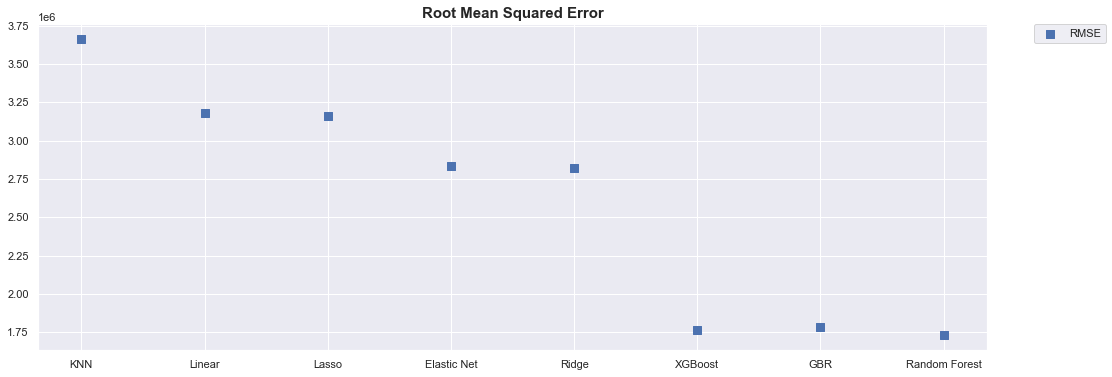

In [103]:
%matplotlib inline

plt.figure(figsize=(17, 6))

plt.scatter(models, list(RMSE.values()),label='RMSE',marker='s',c='b',s=50)
params = {'fontsize': 15,'fontweight':'bold'}
plt.title('Root Mean Squared Error',fontdict=params)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

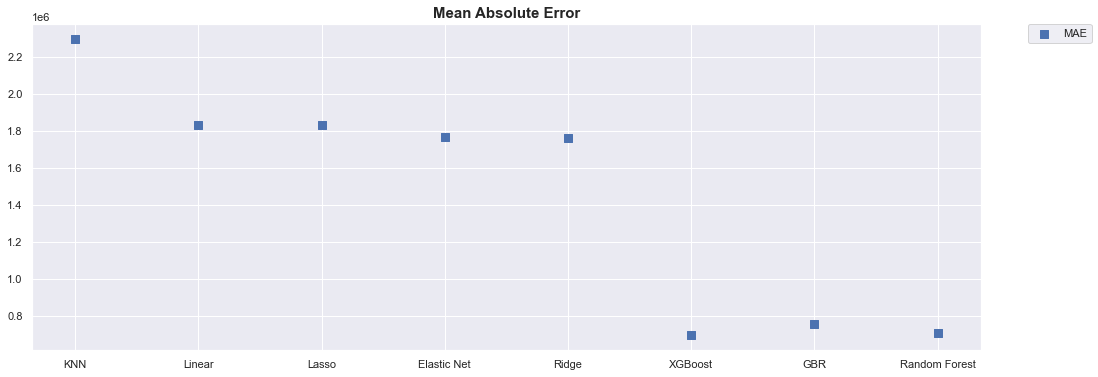

In [104]:
%matplotlib inline

plt.figure(figsize=(17, 6))

# Generic
plt.scatter(models, list(MAE.values()),label='MAE',marker='s',c='b',s=50)

params = {'fontsize': 15,'fontweight':'bold'}
plt.title('Mean Absolute Error',fontdict=params)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

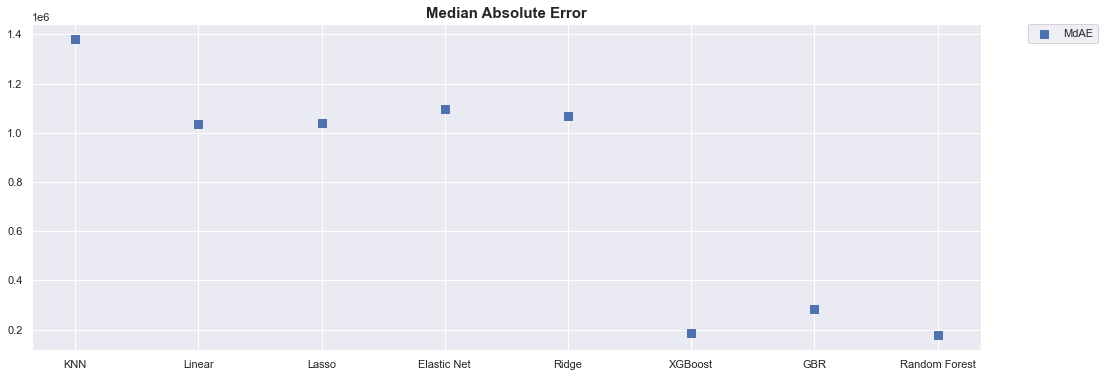

In [98]:
%matplotlib inline

plt.figure(figsize=(17, 6))

# Generic
plt.scatter(models, list(MdAE.values()),label='MdAE',marker='s',c='b',s=50)

params = {'fontsize': 15,'fontweight':'bold'}
plt.title('Median Absolute Error',fontdict=params)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

(0.25, 1.0)

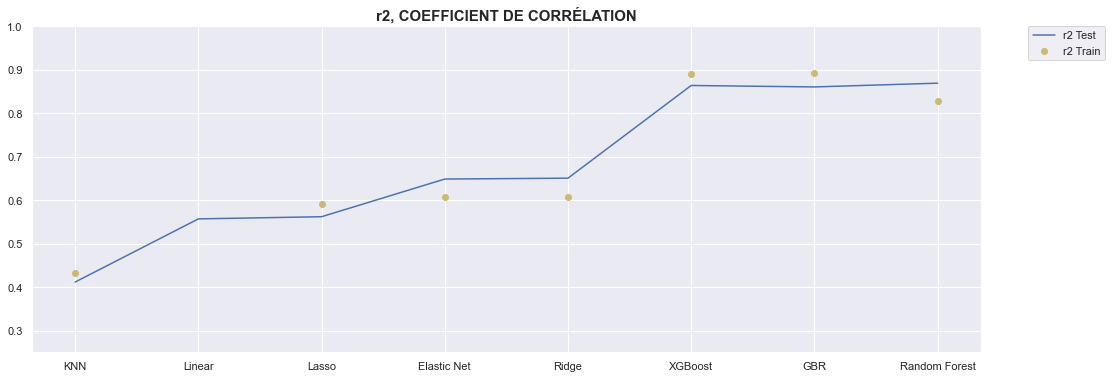

In [99]:
%matplotlib inline

plt.figure(figsize=(17, 6))

# Train
plt.scatter(models, list(r2_train.values()),label='r2 Train',marker='o',c='y')
plt.plot(models, list(r2_test.values()),label='r2 Test',marker='',c='b')

params = {'fontsize': 15,'fontweight':'bold'}
plt.title('r2, COEFFICIENT DE CORRÉLATION',fontdict=params)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.ylim([0.25,1])

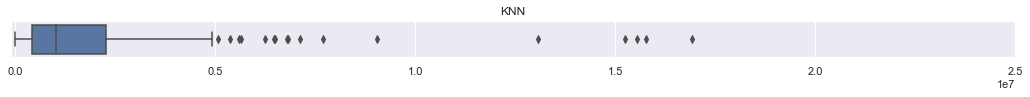

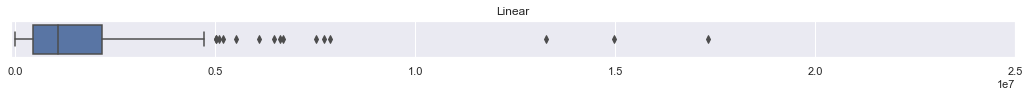

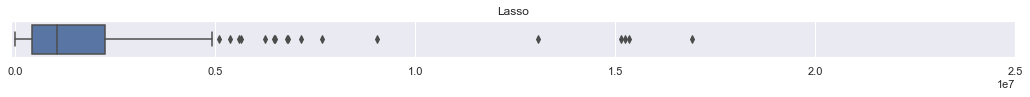

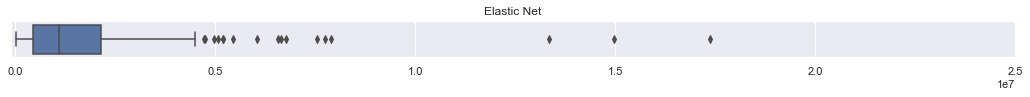

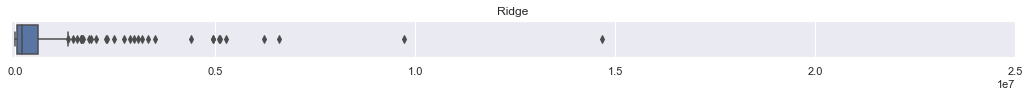

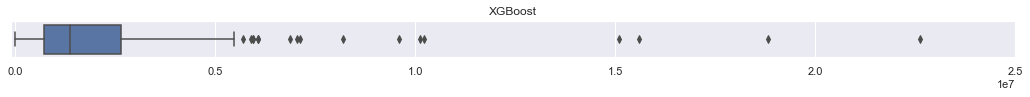

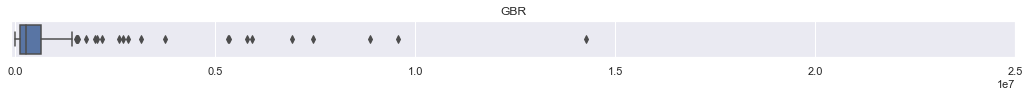

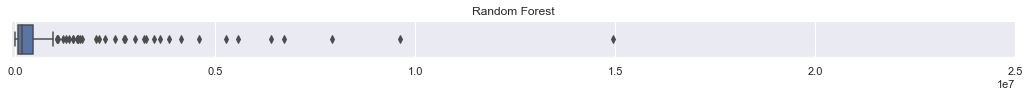

In [100]:
# Répartition de la taille des erreurs en norme euclidienne
%matplotlib inline
sns.set()

y_tests = [y_test,y_test,y_test,y_test,y_test,y_test,y_test,y_test]
y_preds = [y_pred_lr,y_pred_ridge,y_pred_lasso,y_pred_elastic,y_pred_rf,y_pred_knn,y_pred_gbr,y_pred_xgbr]

for i,j,k in zip(y_tests,y_preds,models):
    fig, ax = plt.subplots(figsize=(18,1/12*len(y_tests)))
    plt.xlim([-100000,2.5e7])
    delta = np.sqrt(np.square(i-j))
    sns.boxplot(delta)
    plt.title(k)
    plt.xlabel('')

<IPython.core.display.Javascript object>


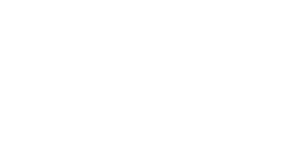

In [75]:
# Représentation graphique des données en dimensions
%matplotlib notebook
x = X_test[:,0]
y = X_test[:,6]
z = y_test
# Pour une dimension
fig = plt.subplots(figsize=(7,1/40*len(z)))
ax = plt.axes(projection ="3d")
plt.xlabel('axe 3')
plt.ylabel('axe 4')
# Creating plot
ax.scatter3D(x,y,z, s=10,alpha=.5)

# Feature importance

Ici le modèle selectionné est Random Forest Regressor avec une performance de 0.73

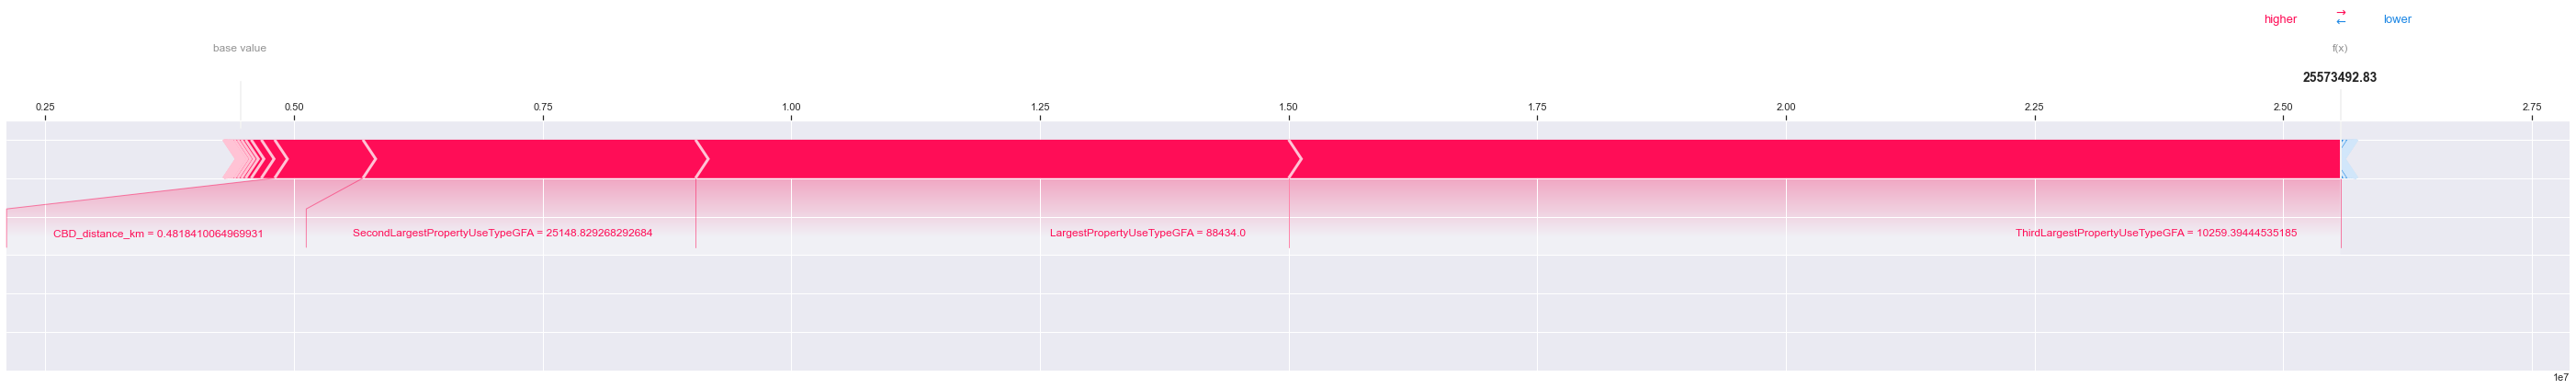

In [76]:
%matplotlib inline
explainer = shap.TreeExplainer(randomforest)
shap_values = explainer.shap_values(X)

shap.force_plot(explainer.expected_value,
                shap_values[0, :],
                pd.DataFrame(X).iloc[0, :],
                matplotlib=True,figsize=(50, 5))

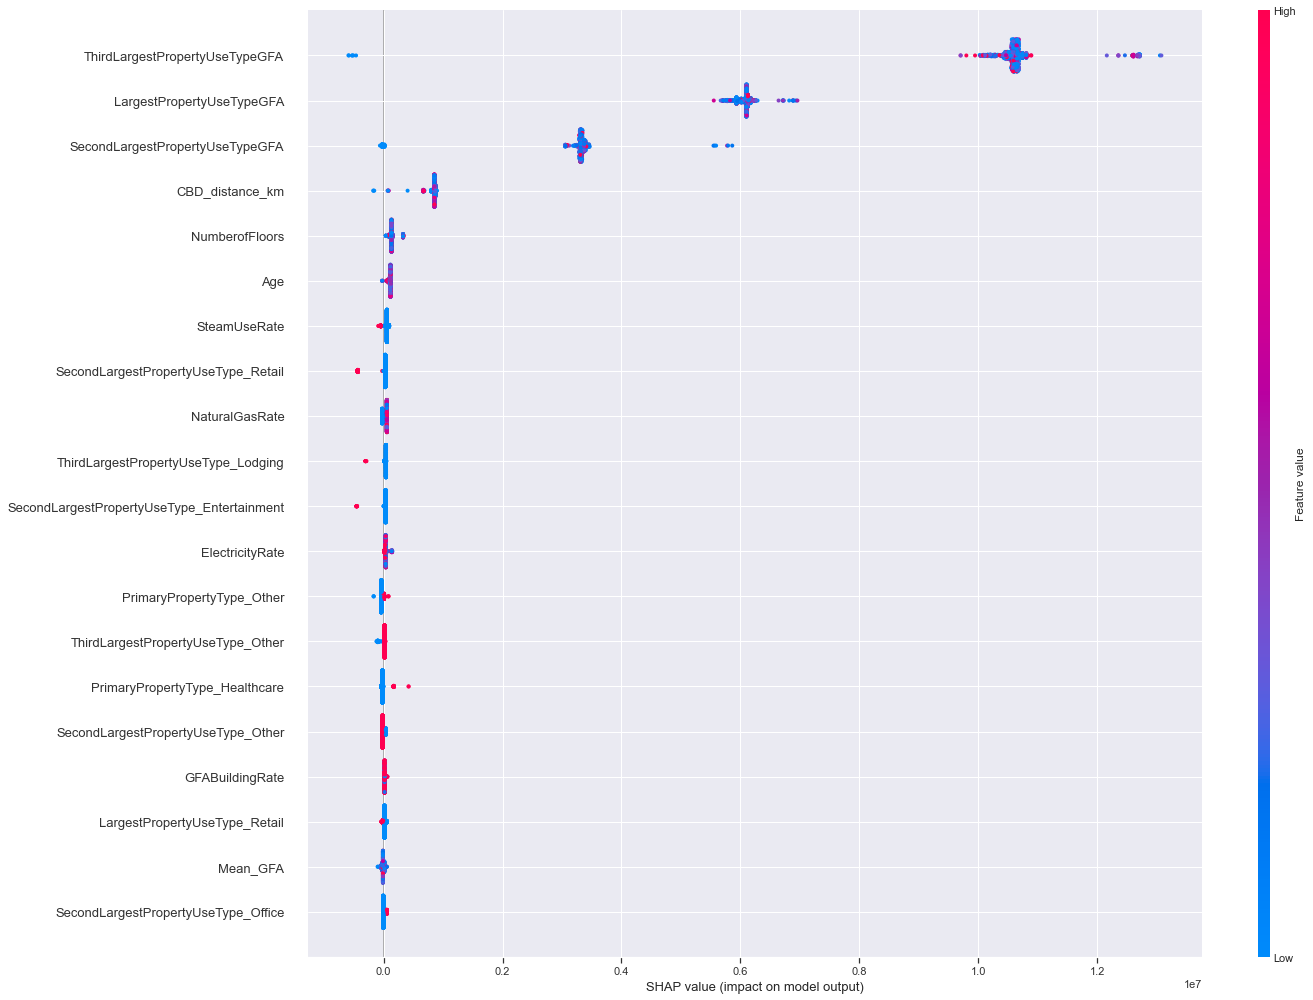

In [78]:
shap.summary_plot(shap_values, X, plot_size=(20,14))

In [79]:
import lime 
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_xgbr),
    feature_names=X.columns,
    class_names=['bad', 'good'],
    mode='regression'
)

lime_exp = lime_explainer.explain_instance(
    data_row=pd.DataFrame(X_test_xgbr).iloc[1],
    predict_fn=xgbr.predict
)
lime_exp.show_in_notebook(show_table=True)